# Data Analysis with Python - Part 1

## Introduction

The objective of this notebook is to use the simple functions in Pandas to analyze the grocery sales dataset and then visualize it using Seaborn. Apart from deriving some summary metrics, we'll also frame some questions and find answers from the dataset by delving into it. This will be a very good practise for data analytics enthusiasts.

## Table of Contents

* Importing Libraries and Dataset
* Data Manipulation
* Preparing Summary Metrics
* Answering the Questions
* Conclusion

## Importing Libraries and Dataset

In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Let us read the input dataset and store it in a dataframe. After loading it, we'll take a look at any 5 rows from the dataframe to understand the data. We'll use sample() to extract few samples out of the dataframe.

Alternatively, you can use .head() or .tail() functions to extract the first N or the last N rows respectively.

In [343]:
df_central = pd.read_csv('./Supermart Grocery Sales Central Region.csv')
df_central

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD15,Sundar,NaN,Chicken,Kanyakumari,NaN,Central,831.0,0.22,207.75,Tamil Nadu
1,OD16,Ramesh,Oil & Masala,Edible Oil & Ghee,Krishnagiri,11/22/2016,Central,1440.0,0.11,100.80,NaN
2,OD17,Alan,Bakery,Cakes,Dharmapuri,11-11-2015,Central,1678.0,0.28,318.82,NaN
3,OD22,Alan,Food Grains,Dals & Pulses,Karur,NaN,Central,948.0,0.13,47.40,Tamil Nadu
4,NaN,Haseena,NaN,NaN,Krishnagiri,12-09-2017,Central,NaN,NaN,148.47,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
1821,OD9855,Kumar,Snacks,Noodles,Viluppuram,NaN,Central,1292.0,0.34,348.84,Tamil Nadu
1822,OD9856,James,NaN,Organic Fruits,NaN,NaN,Central,1168.0,0.19,NaN,Tamil Nadu
1823,OD9857,Yusuf,Oil & Masala,Masalas,Pudukottai,03-08-2017,Central,2322.0,0.10,348.30,Tamil Nadu
1824,OD9859,Shree,Food Grains,Rice,Perambalur,NaN,Central,1448.0,0.15,NaN,Tamil Nadu


In [344]:
df_east = pd.read_csv('./Supermart Grocery Sales East Region.csv')
df_east

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,NaN,Veronica,Beverages,Soft Drinks,Krishnagiri,NaN,East,1988.0,NaN,874.72,NaN
1,OD30,NaN,Oil & Masala,Masalas,Kanyakumari,9/17/2016,East,989.0,0.17,69.23,Tamil Nadu
2,OD31,Ramesh,Beverages,Soft Drinks,Dharmapuri,9/17/2016,East,NaN,0.24,166.05,Tamil Nadu
3,NaN,NaN,Snacks,NaN,Vellore,9/17/2016,East,1400.0,NaN,420.00,Tamil Nadu
4,OD33,Akash,NaN,NaN,Trichy,NaN,East,2163.0,0.26,670.53,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
2274,NaN,Ganesh,Fruits & Veggies,Organic Vegetables,Coimbatore,12/23/2017,East,872.0,0.18,148.24,Tamil Nadu
2275,OD9909,Hussain,Oil & Masala,Masalas,NaN,NaN,East,1652.0,NaN,479.08,Tamil Nadu
2276,OD9910,Amrish,Bakery,Breads & Buns,Viluppuram,7/21/2018,East,920.0,0.14,220.80,Tamil Nadu
2277,OD9911,Akash,"Eggs, Meat & Fish",Mutton,Cumbum,11-10-2017,East,1847.0,0.26,591.04,Tamil Nadu


In [345]:
df_west = pd.read_csv('./Supermart Grocery Sales West Region.csv')
df_west

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,NaN,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360.0,0.21,165.20,Tamil Nadu
1,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305.0,0.26,NaN,Tamil Nadu
2,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791.0,0.23,NaN,Tamil Nadu
3,OD10,NaN,NaN,Cakes,Chennai,06-09-2015,West,NaN,0.27,484.65,NaN
4,OD11,Ganesh,NaN,Chocolates,Karur,06-09-2015,West,1903.0,0.13,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2561,OD9989,Jackson,Snacks,NaN,Vellore,11-03-2016,West,1460.0,0.15,452.60,Tamil Nadu
2562,OD9990,Sudeep,"Eggs, Meat & Fish",NaN,NaN,12/24/2015,West,945.0,0.16,359.10,Tamil Nadu
2563,NaN,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,NaN,0.26,NaN,Tamil Nadu
2564,OD9993,Peer,Oil & Masala,Spices,NaN,10/16/2018,West,NaN,0.15,597.24,Tamil Nadu


In [346]:
df_south = pd.read_csv('./Supermart Grocery Sales South Region.csv')
df_south

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749.0,NaN,149.80,Tamil Nadu
1,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896.0,NaN,NaN,Tamil Nadu
2,OD5,NaN,Food Grains,Organic Staples,NaN,10-11-2016,South,2355.0,NaN,918.45,Tamil Nadu
3,NaN,NaN,Oil & Masala,Masalas,Ooty,06-04-2017,South,1232.0,0.14,554.40,Tamil Nadu
4,OD73,Alan,Snacks,Cookies,Theni,NaN,South,721.0,0.27,NaN,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
1267,NaN,Jonas,Beverages,Health Drinks,Viluppuram,05-05-2017,South,1141.0,0.12,68.46,NaN
1268,OD9936,NaN,Snacks,Noodles,NaN,10/24/2017,South,1411.0,0.16,395.08,Tamil Nadu
1269,OD9940,Adavan,Snacks,Chocolates,Bodi,11-02-2015,South,NaN,0.15,624.00,Tamil Nadu
1270,OD9941,NaN,Beverages,Soft Drinks,NaN,3/18/2015,South,2379.0,0.23,428.22,NaN


In [347]:
df = pd.concat([df_east,df_central,df_west,df_south], ignore_index=True)
df.sample(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
1082,NaN,Aditi,Snacks,Cookies,Madurai,11-03-2018,East,1232.0,NaN,184.80,NaN
6396,OD9019,Verma,"Eggs, Meat & Fish",Mutton,Pudukottai,12-09-2018,West,1507.0,0.35,NaN,Tamil Nadu
708,OD2827,Arvind,Beverages,Soft Drinks,Theni,1/19/2018,East,1791.0,NaN,NaN,Tamil Nadu
228,OD937,Ravi,NaN,Soft Drinks,Ramanadhapuram,6/20/2017,East,NaN,0.19,NaN,Tamil Nadu
658,OD2758,Veena,"Eggs, Meat & Fish",Mutton,Karur,12-05-2017,East,1992.0,0.28,418.32,Tamil Nadu


In [348]:
df.head(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,NaN,Veronica,Beverages,Soft Drinks,Krishnagiri,NaN,East,1988.0,NaN,874.72,NaN
1,OD30,NaN,Oil & Masala,Masalas,Kanyakumari,9/17/2016,East,989.0,0.17,69.23,Tamil Nadu
2,OD31,Ramesh,Beverages,Soft Drinks,Dharmapuri,9/17/2016,East,NaN,0.24,166.05,Tamil Nadu
3,NaN,NaN,Snacks,NaN,Vellore,9/17/2016,East,1400.0,NaN,420.00,Tamil Nadu
4,OD33,Akash,NaN,NaN,Trichy,NaN,East,2163.0,0.26,670.53,Tamil Nadu


In [349]:
df.tail(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
7938,NaN,Jonas,Beverages,Health Drinks,Viluppuram,05-05-2017,South,1141.0,0.12,68.46,NaN
7939,OD9936,NaN,Snacks,Noodles,NaN,10/24/2017,South,1411.0,0.16,395.08,Tamil Nadu
7940,OD9940,Adavan,Snacks,Chocolates,Bodi,11-02-2015,South,NaN,0.15,624.00,Tamil Nadu
7941,OD9941,NaN,Beverages,Soft Drinks,NaN,3/18/2015,South,2379.0,0.23,428.22,NaN
7942,OD9942,Amrish,Snacks,Cookies,NaN,3/18/2015,South,1843.0,0.21,829.35,Tamil Nadu


Let us quickly check the information about the dataset.

##Examining The Data

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7943 entries, 0 to 7942
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       6342 non-null   object 
 1   Customer Name  6348 non-null   object 
 2   Category       6404 non-null   object 
 3   Sub Category   6404 non-null   object 
 4   City           6322 non-null   object 
 5   Order Date     6373 non-null   object 
 6   Region         7943 non-null   object 
 7   Sales          6341 non-null   float64
 8   Discount       6334 non-null   float64
 9   Profit         6357 non-null   float64
 10  State          6364 non-null   object 
dtypes: float64(3), object(8)
memory usage: 682.7+ KB


In [351]:
df.isnull().sum()

Order ID         1601
Customer Name    1595
Category         1539
Sub Category     1539
City             1621
Order Date       1570
Region              0
Sales            1602
Discount         1609
Profit           1586
State            1579
dtype: int64

In [352]:
df.isnull().sum()/df.shape[0]

Order ID         0.201561
Customer Name    0.200806
Category         0.193756
Sub Category     0.193756
City             0.204079
Order Date       0.197658
Region           0.000000
Sales            0.201687
Discount         0.202568
Profit           0.199673
State            0.198791
dtype: float64

In [353]:
(df.isnull().sum()/df.shape[0]).round(2)

Order ID         0.20
Customer Name    0.20
Category         0.19
Sub Category     0.19
City             0.20
Order Date       0.20
Region           0.00
Sales            0.20
Discount         0.20
Profit           0.20
State            0.20
dtype: float64

In [354]:
df.describe()

,Sales,Discount,Profit
count,6341.000000,6334.000000,6357.000000
mean,1498.946381,0.227024,376.365863
std,580.331820,0.074509,240.521891
min,500.000000,0.100000,25.450000
25%,1000.000000,0.160000,180.360000
50%,1500.000000,0.230000,323.380000
75%,2005.000000,0.290000,530.040000
max,2500.000000,0.350000,1120.950000


In [355]:
df.describe(include='object')

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,State
count,6342,6348,6404,6404,6322,6373,7943,6364
unique,6342,50,7,23,24,1164,4,1
top,OD30,Amrish,Snacks,Soft Drinks,Kanyakumari,12-01-2018,West,Tamil Nadu
freq,1,149,966,457,299,25,2566,6364


We'll take a look at the Region column to understand the spread of different categories. 

##Data Cleaning

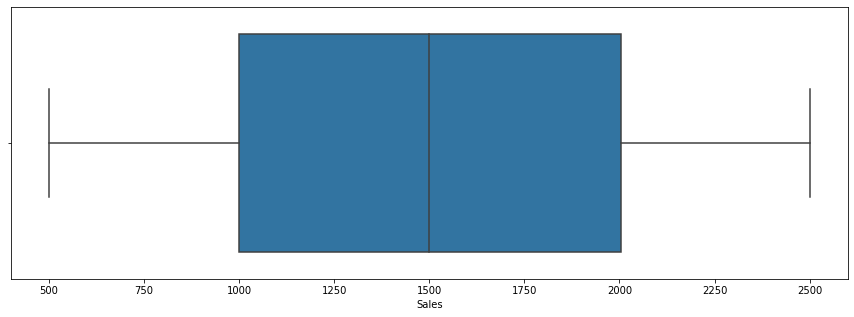

In [356]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Sales', data=df)
plt.show()

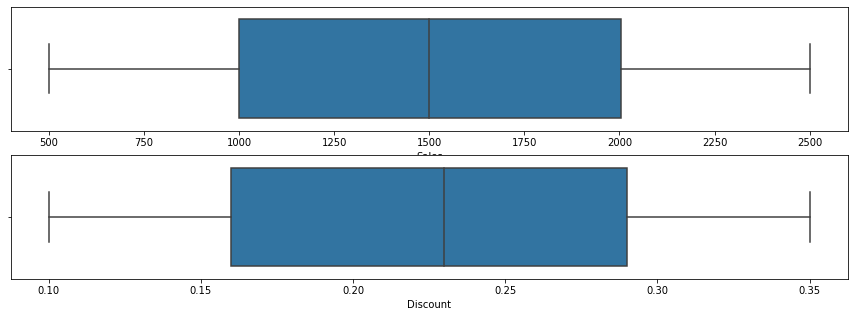

In [357]:
plt.figure(figsize=(15,5))

plt.subplot(2,1,1)
sns.boxplot(x='Sales', data=df)

plt.subplot(2,1,2)
sns.boxplot(x='Discount', data=df)

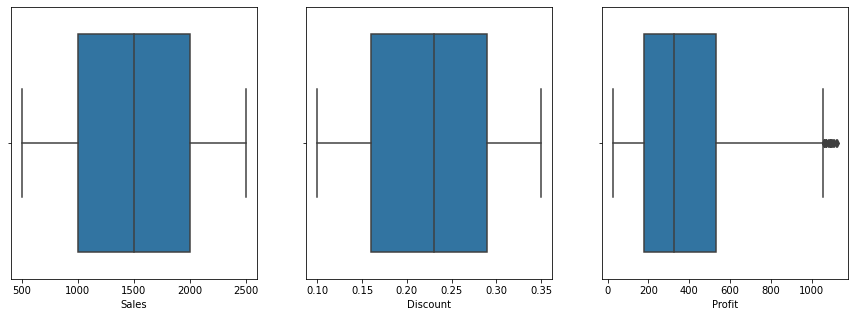

In [358]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x='Sales', data=df)

plt.subplot(1,3,2)
sns.boxplot(x='Discount', data=df)

plt.subplot(1,3,3)
sns.boxplot(x='Profit', data=df)

plt.show()

In [359]:
#Jika numerik dengan outlier -> Median
#Jika numerik tanpa outlier -> Mean
#Jika kategorikal -> Modus

df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
df['Discount'] = df['Discount'].fillna(df['Discount'].mean())
df['Profit'] = df['Profit'].fillna(df['Profit'].median())

print(df[['Sales','Discount','Profit']].isnull().sum())

Sales       0
Discount    0
Profit      0
dtype: int64


In [360]:
#Order ID tidak boleh duplikat karena bersifat unique,
#jadi kita tidak dapat mengisi nya dengan modus, oleh karena itu maka akan kita buang yang kosong
#Begitu pula dengan nama dan juga date

df.dropna(subset=['Order ID','Order Date'], inplace=True)
df['Customer Name'] = df['Customer Name'].fillna('Customer')
df['City'] = df['City'].fillna(df['City'].mode()[0])

df[['Order ID','Customer Name','Order Date','City']].isnull().sum()

Order ID         0
Customer Name    0
Order Date       0
City             0
dtype: int64

In [361]:
df.dropna(subset=['Category','Sub Category'], how='all', inplace=True)
df[['Category','Sub Category']].isnull().sum()

Category        796
Sub Category    788
dtype: int64

In [362]:
category = df['Category'].value_counts().index.values
category

array(['Eggs, Meat & Fish', 'Snacks', 'Food Grains', 'Fruits & Veggies',
       'Bakery', 'Beverages', 'Oil & Masala'], dtype=object)

In [363]:
isian_sub = {'Eggs, Meat & Fish' : df[df['Category']=='Eggs, Meat & Fish']['Sub Category'].mode()[0],
             'Snacks' : df[df['Category']=='Snacks']['Sub Category'].mode()[0],
             'Food Grains' : df[df['Category']=='Food Grains']['Sub Category'].mode()[0],
             'Fruits & Veggies' : df[df['Category']=='Fruits & Veggies']['Sub Category'].mode()[0],
             'Bakery' : df[df['Category']=='Bakery']['Sub Category'].mode()[0],
             'Beverages' : df[df['Category']=='Beverages']['Sub Category'].mode()[0],
             'Oil & Masala' : df[df['Category']=='Oil & Masala']['Sub Category'].mode()[0]}

In [364]:
print(isian_sub)

{'Eggs, Meat & Fish': 'Mutton', 'Snacks': 'Noodles', 'Food Grains': 'Dals & Pulses', 'Fruits & Veggies': 'Fresh Vegetables', 'Bakery': 'Breads & Buns', 'Beverages': 'Soft Drinks', 'Oil & Masala': 'Masalas'}


In [365]:
def change_sub(cat,sub_cat,category, isian_sub):

  for i in category: #melakukan iterasi pada setiap kategori

    if (cat==i): #Jika kategori = i
      if(sub_cat != sub_cat): #Jika di kategori i sub kategori nya nan
        return isian_sub[i] #diisi dengan modus pada kategori tersebut
      else:
        return str(sub_cat) #jika tidak kosong, isi dengan nilai aslinya

    elif(cat != cat): #Untuk tetap mendapatkan sub kategori dari yg kolom kategori = nan
      return str(sub_cat)

In [366]:
df[df['Sub Category'].isnull()].head(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
16,OD114,Customer,Fruits & Veggies,NaN,Krishnagiri,8/25/2015,East,1154.0,0.100000,323.38,Tamil Nadu
24,OD132,Customer,Beverages,NaN,Nagercoil,02-02-2018,East,2112.0,0.227024,323.38,Tamil Nadu
56,OD277,Shah,"Eggs, Meat & Fish",NaN,Ramanadhapuram,10/13/2018,East,812.0,0.170000,323.38,Tamil Nadu
57,OD278,Ram,Oil & Masala,NaN,Virudhunagar,10/13/2018,East,862.0,0.227024,137.92,Tamil Nadu
72,OD321,Alan,Fruits & Veggies,NaN,Dharmapuri,11-04-2015,East,1771.0,0.280000,602.14,Tamil Nadu


In [367]:
df['Sub Category'] = df.apply(lambda x: change_sub(x['Category'],x['Sub Category'], category, isian_sub), axis=1)

In [368]:
df.loc[[16,24,56,57,72]]

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
16,OD114,Customer,Fruits & Veggies,Fresh Vegetables,Krishnagiri,8/25/2015,East,1154.0,0.100000,323.38,Tamil Nadu
24,OD132,Customer,Beverages,Soft Drinks,Nagercoil,02-02-2018,East,2112.0,0.227024,323.38,Tamil Nadu
56,OD277,Shah,"Eggs, Meat & Fish",Mutton,Ramanadhapuram,10/13/2018,East,812.0,0.170000,323.38,Tamil Nadu
57,OD278,Ram,Oil & Masala,Masalas,Virudhunagar,10/13/2018,East,862.0,0.227024,137.92,Tamil Nadu
72,OD321,Alan,Fruits & Veggies,Fresh Vegetables,Dharmapuri,11-04-2015,East,1771.0,0.280000,602.14,Tamil Nadu


In [369]:
isian_cat = {'Eggs, Meat & Fish' : df[df['Category']=='Eggs, Meat & Fish']['Sub Category'].unique(),
             'Snacks' : df[df['Category']=='Snacks']['Sub Category'].unique(),
             'Food Grains' : df[df['Category']=='Food Grains']['Sub Category'].unique(),
             'Fruits & Veggies' : df[df['Category']=='Fruits & Veggies']['Sub Category'].unique(),
             'Bakery' : df[df['Category']=='Bakery']['Sub Category'].unique(),
             'Beverages' : df[df['Category']=='Beverages']['Sub Category'].unique(),
             'Oil & Masala' : df[df['Category']=='Oil & Masala']['Sub Category'].unique()}

In [370]:
isian_cat

{'Eggs, Meat & Fish': array(['Mutton', 'Fish', 'Chicken', 'Eggs'], dtype=object),
 'Snacks': array(['Noodles', 'Chocolates', 'Cookies'], dtype=object),
 'Food Grains': array(['Dals & Pulses', 'Atta & Flour', 'Organic Staples', 'Rice'],
       dtype=object),
 'Fruits & Veggies': array(['Fresh Vegetables', 'Organic Fruits', 'Fresh Fruits',
        'Organic Vegetables'], dtype=object),
 'Bakery': array(['Cakes', 'Breads & Buns', 'Biscuits'], dtype=object),
 'Beverages': array(['Soft Drinks', 'Health Drinks'], dtype=object),
 'Oil & Masala': array(['Masalas', 'Edible Oil & Ghee', 'Spices'], dtype=object)}

In [371]:
value = 'Mutton'
# Get list of keys that contains the given value
keys = [key for key, list_of_values in isian_cat.items() if value in list_of_values]

print(keys[0])

Eggs, Meat & Fish


In [372]:
def change_cat(cat,sub_cat, isian_cat):

  if(cat != cat):
    keys = [key for key, list_of_values in isian_cat.items() if sub_cat in list_of_values]
    return str(keys[0])
  else:
    return str(cat)

In [373]:
df[df['Category'].isnull()].head(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
17,OD115,Muneer,NaN,Noodles,Salem,8/25/2015,East,2420.000000,0.110000,323.38,Tamil Nadu
37,OD201,James,NaN,Organic Staples,Tirunelveli,6/24/2018,East,1498.946381,0.220000,243.32,Tamil Nadu
42,OD217,Sundar,NaN,Rice,Krishnagiri,01-02-2016,East,1733.000000,0.227024,433.25,Tamil Nadu
43,OD220,Arvind,NaN,Fresh Vegetables,Pudukottai,12/24/2016,East,2110.000000,0.227024,323.38,Tamil Nadu
45,OD222,Willams,NaN,Fish,Vellore,12/24/2016,East,1557.000000,0.227024,638.37,Tamil Nadu


In [374]:
df['Category'] = df.apply(lambda x: change_cat(x['Category'],x['Sub Category'], isian_cat), axis=1)

In [375]:
df.loc[[17,37,42,43,45]]

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
17,OD115,Muneer,Snacks,Noodles,Salem,8/25/2015,East,2420.000000,0.110000,323.38,Tamil Nadu
37,OD201,James,Food Grains,Organic Staples,Tirunelveli,6/24/2018,East,1498.946381,0.220000,243.32,Tamil Nadu
42,OD217,Sundar,Food Grains,Rice,Krishnagiri,01-02-2016,East,1733.000000,0.227024,433.25,Tamil Nadu
43,OD220,Arvind,Fruits & Veggies,Fresh Vegetables,Pudukottai,12/24/2016,East,2110.000000,0.227024,323.38,Tamil Nadu
45,OD222,Willams,"Eggs, Meat & Fish",Fish,Vellore,12/24/2016,East,1557.000000,0.227024,638.37,Tamil Nadu


In [376]:
df.isnull().sum()

Order ID           0
Customer Name      0
Category           0
Sub Category       0
City               0
Order Date         0
Region             0
Sales              0
Discount           0
Profit             0
State            960
dtype: int64

In [377]:
df['State'] = df['State'].fillna('Tamil Nadu')
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [378]:
df.describe()

,Sales,Discount,Profit
count,4907.000000,4907.000000,4907.000000
mean,1506.945185,0.227392,367.014675
std,520.679349,0.066119,215.892710
min,500.000000,0.100000,27.650000
25%,1135.000000,0.180000,214.280000
50%,1498.946381,0.227024,323.380000
75%,1893.000000,0.270000,475.870000
max,2500.000000,0.350000,1120.950000


In [379]:
df.describe(include='object')

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,State
count,4907,4907,4907,4907,4907,4907,4907,4907
unique,4907,51,7,23,24,1110,4,1
top,OD30,Customer,Snacks,Soft Drinks,Bodi,12-08-2018,West,Tamil Nadu
freq,1,994,735,396,1209,20,1569,4907


## Data Manipulation

In [380]:
df['Region'].value_counts()

West       1569
East       1402
Central    1142
South       794
Name: Region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


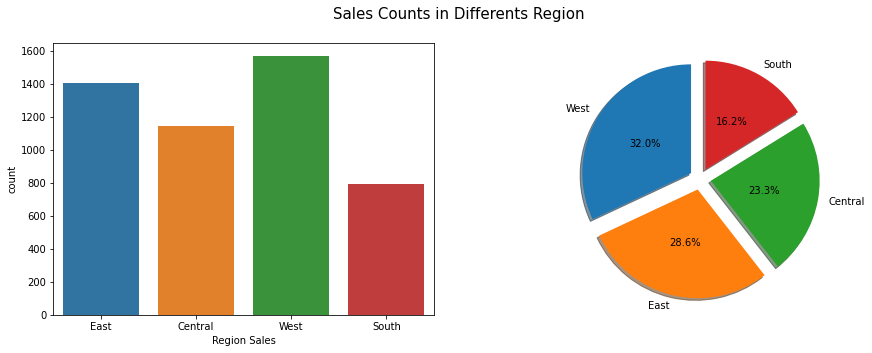

In [381]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.countplot(df['Region'],)
plt.xlabel('Region Sales', fontsize = 10)

plt.subplot(1, 2, 2)
df['Region'].value_counts().plot(kind = 'pie', explode = [0.1, 0.1, 0.1, 0.1], autopct = '%.1f%%', startangle = 90,
                                 shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Sales Counts in Differents Region', fontsize = 15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


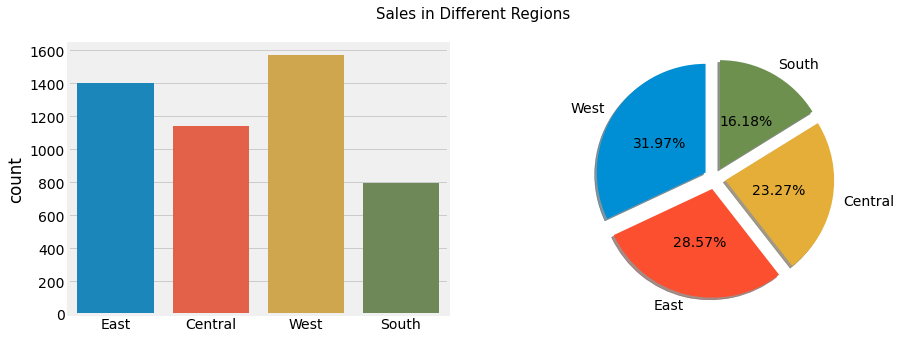

In [382]:
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(df['Region'],)
plt.xlabel('', fontsize = 10)

plt.subplot(1, 2, 2)
df['Region'].value_counts().plot(kind = 'pie', explode = [0.1, 0.1, 0.1, 0.1], autopct = '%.2f%%', startangle = 90,
                                 shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Sales in Different Regions', fontsize = 15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


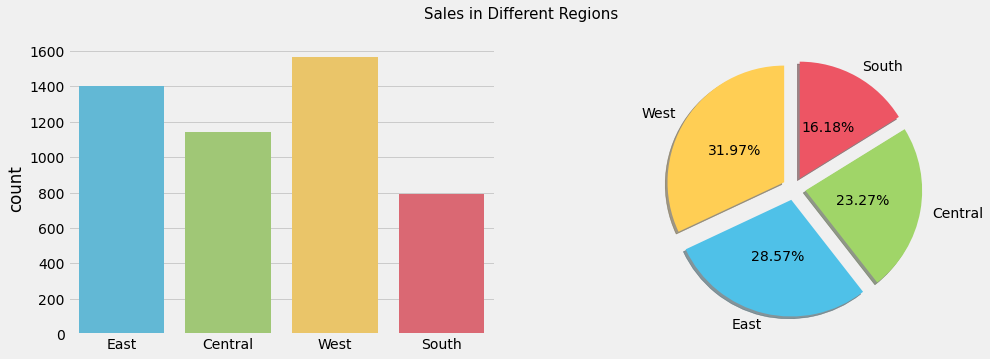

In [383]:
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(df['Region'], palette=['#4fc1e8', '#a0d568', '#ffce54','#ed5564'])
plt.xlabel('', fontsize = 10)

plt.subplot(1, 2, 2)
df['Region'].value_counts().plot(kind = 'pie', explode = [0.1, 0.1, 0.1, 0.1], autopct = '%.2f%%', startangle = 90,
                                 shadow = True, pctdistance = 0.5, colors=['#ffce54', '#4fc1e8', '#a0d568', '#ed5564'])
plt.axis('off')

plt.suptitle('Sales in Different Regions', fontsize = 15)
plt.show()

We'll now extract the year from the order date. The Order Date is in the string type, so let us use the string manipulation technique to do the same.

In [384]:
df['Order Date'].head(2)

1    9/17/2016
2    9/17/2016
Name: Order Date, dtype: object

In [385]:
df['Order Date'].values[0][:2].replace('/','')

'9'

In [392]:
df['Order Year'] = df['Order Date'].str[-4:]
df['Order Year'].value_counts()

2018    1658
2017    1262
2016     997
2015     990
Name: Order Year, dtype: int64

## Preparing Summary Metrics

Let us prepare the summary metrics one by one. We'll start with the region wise analysis of sales and orders. We'll use pivot_table() function throughout this notebook. Please pay attention on how the aggfunc() could be tailored for our requirements.

### Total Sales & Orders by Region

In [394]:
region = pd.pivot_table(data=df, index='Region', values=['Order ID', 'Sales'], 
                        aggfunc = {'Order ID':'count', 'Sales':'sum'}).reset_index().sort_values(by='Sales', ascending=False)
region

,Region,Order ID,Sales
3,West,1569,2.369521e+06
1,East,1402,2.097378e+06
0,Central,1142,1.718812e+06
2,South,794,1.208869e+06


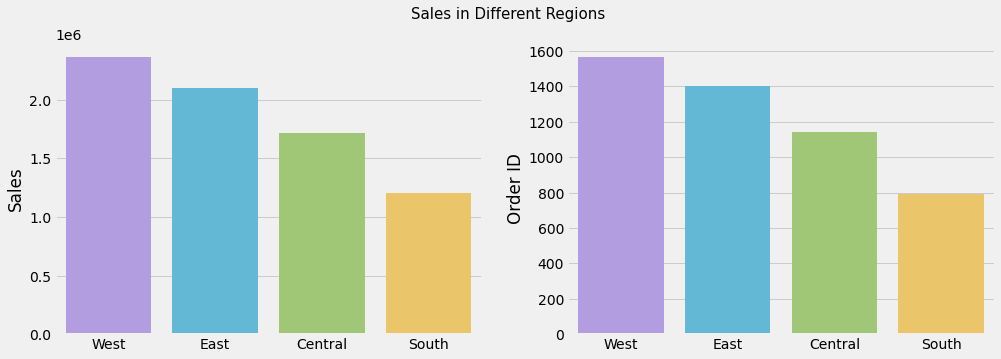

In [395]:
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.barplot(x='Region', y='Sales', data=region,
            palette=['#ac92eb', '#4fc1e8', '#a0d568', '#ffce54'])
plt.xlabel('', fontsize = 10)

plt.subplot(1, 2, 2)
sns.barplot(x='Region', y='Order ID', data=region,
            palette=['#ac92eb', '#4fc1e8', '#a0d568', '#ffce54'])
plt.xlabel('', fontsize = 10)

plt.suptitle('Sales in Different Regions', fontsize = 15)
plt.show()

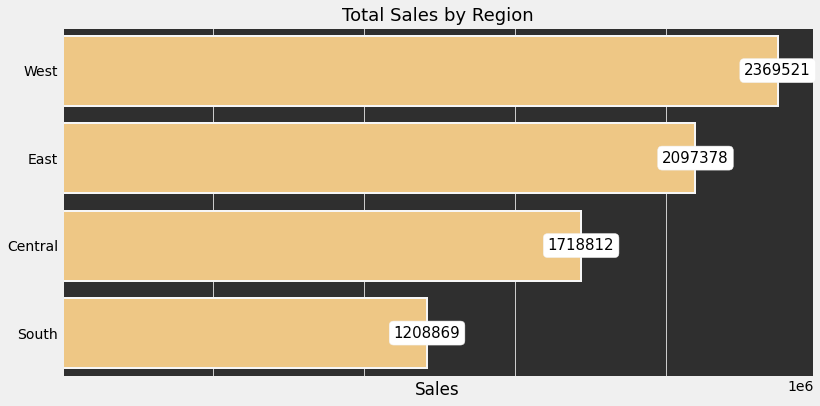

In [396]:
# fixing the graph size
plt.rcParams['figure.figsize'] = (12,6)

# setting the background color
ax = plt.axes()
ax.set_facecolor('#2F2F2f')

# plotting a bar graph
sns.barplot(y='Region', x='Sales', data=region, color='#FFCB74', linewidth=2, edgecolor='#F6F6F6')

# annotating the values on the plot
bbox_args = dict(boxstyle = 'round', fc = '1')
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
             ha = 'center', 
             va = 'center', 
             color = 'black', 
             bbox = bbox_args, 
             fontsize = 15)

# formatting the graph
plt.title('Total Sales by Region', fontsize = 18)
plt.tick_params(left=False, bottom=False, labelbottom=False)
plt.ylabel(None)

plt.show()

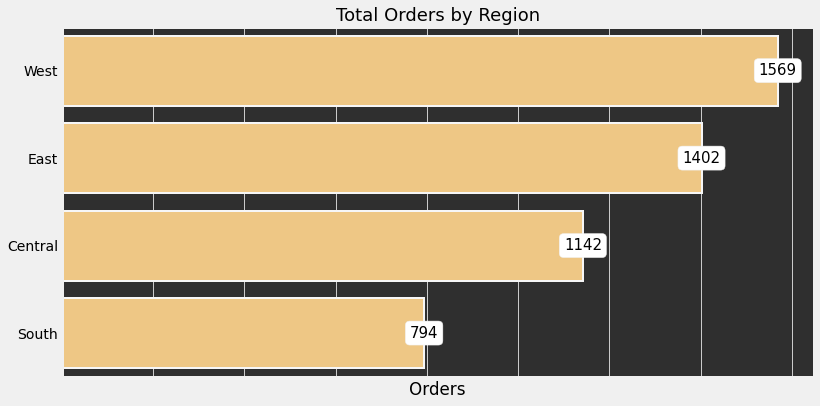

In [397]:
# fixing the graph size
plt.rcParams['figure.figsize'] = (12,6)

# setting the background color
ax = plt.axes()
ax.set_facecolor('#2F2F2f')

# plotting a bar graph
sns.barplot(y='Region', x='Order ID', data=region, color='#FFCB74', linewidth=2, edgecolor='#F6F6F6')

# annotating the values on the plot
bbox_args = dict(boxstyle = 'round', fc = '1')
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
             ha = 'center', 
             va = 'center', 
             color = 'black', 
             bbox = bbox_args, 
             fontsize = 15)

# formatting the graph
plt.title('Total Orders by Region', fontsize = 18)
plt.tick_params(left=False, bottom=False, labelbottom=False)
plt.xlabel('Orders')
plt.ylabel(None)

plt.show()

### Total Sales by Category & Sub Category

We'll now find the total sales by Category and further group it down to each Sub Category within it. We'll assign two values within the index parameter of the .pivot_table() function to achieve the results.

In [398]:
category_sales = pd.pivot_table(data=df, index=['Category', 'Sub Category'], values='Sales', 
               aggfunc='sum').reset_index().sort_values(['Category', 'Sales'], ascending=False)
category_sales

,Category,Sub Category,Sales
22,Snacks,Noodles,493875.193029
20,Snacks,Chocolates,308514.747989
21,Snacks,Cookies,280157.445040
18,Oil & Masala,Masalas,456415.514745
17,Oil & Masala,Edible Oil & Ghee,253193.908847
19,Oil & Masala,Spices,251136.176944
14,Fruits & Veggies,Fresh Vegetables,403694.479893
13,Fruits & Veggies,Fresh Fruits,236229.230563
15,Fruits & Veggies,Organic Fruits,218535.284182
16,Fruits & Veggies,Organic Vegetables,200027.445040


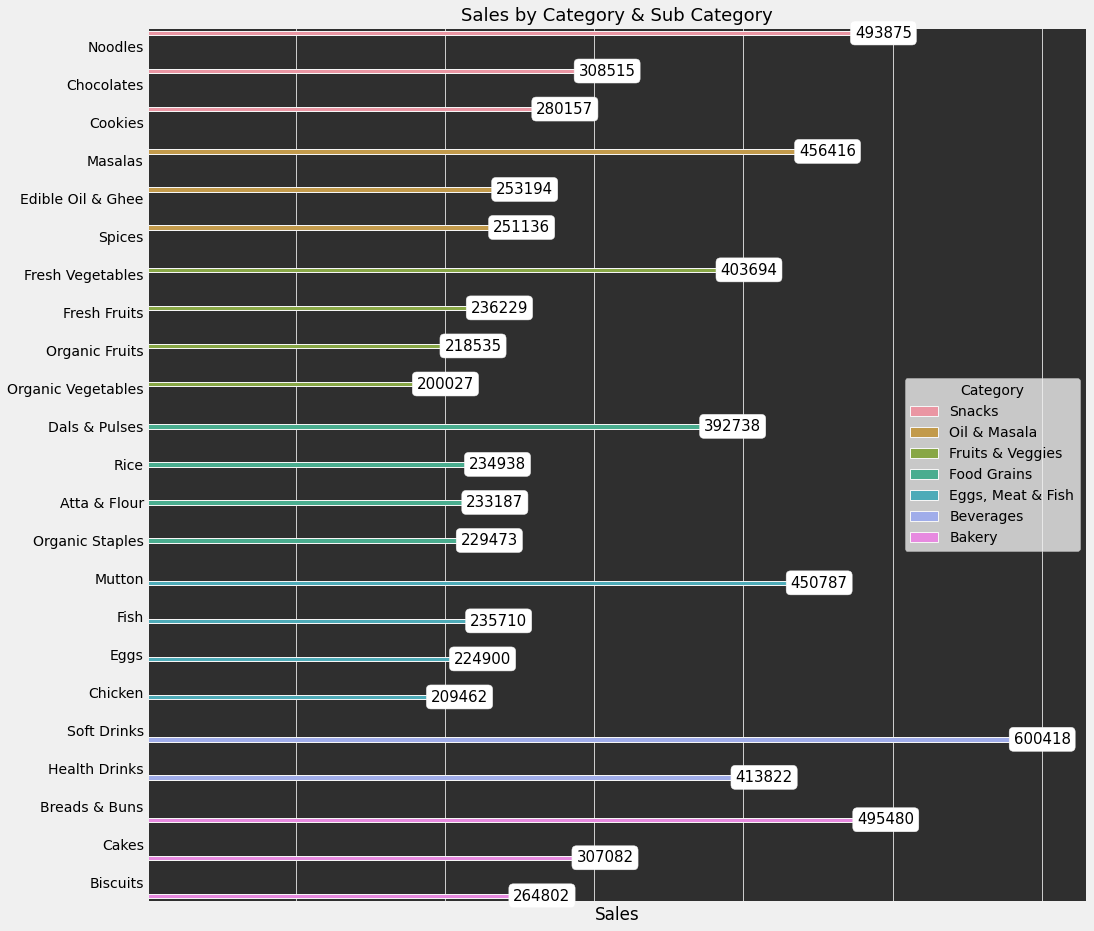

In [401]:
# fixing the graph size
plt.rcParams['figure.figsize'] = (15,15)

# setting the background color
ax = plt.axes()
ax.set_facecolor('#2F2F2F')

# plotting a bar plot with Category as the distinguishing parameter
sns.barplot(y='Sub Category', x='Sales', data=category_sales, hue='Category', linewidth=1, edgecolor='#F6F6F6')

# annotating the values on the plot
bbox_args = dict(boxstyle = 'round', fc = '1')
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
             ha = 'center', 
             va = 'center', 
             color = 'black', 
             bbox = bbox_args, 
             fontsize = 15)

# formatting the graph
plt.title('Sales by Category & Sub Category', fontsize = 18)
plt.ylabel(None)
plt.tick_params(left=False, bottom=False, labelbottom=False)
plt.show()

The hue parameter of the barplot() helped us distinguish the Sub Categories by the Category to which they belong to.

### Profit Margin by Sub Category

The profit margin can be calculated by dividing the profit by the total sales. As this needs to be computed for each sub category, we did not compute this on the original dataset. First let us group the data by sub category and then compute the profit margin.

In [402]:
profit = pd.pivot_table(data=df, index='Sub Category', values=['Sales', 'Profit'], aggfunc='sum').reset_index()
profit

,Sub Category,Profit,Sales
0,Atta & Flour,51250.02,233186.713137
1,Biscuits,59434.85,264802.284182
2,Breads & Buns,122843.86,495479.675603
3,Cakes,73253.76,307082.426273
4,Chicken,48606.37,209462.391421
5,Chocolates,78249.71,308514.747989
6,Cookies,71126.94,280157.445040
7,Dals & Pulses,93798.40,392738.104558
8,Edible Oil & Ghee,64248.07,253193.908847
9,Eggs,52972.40,224900.337802


In [403]:
profit['Profit Margin'] = round((profit['Profit']/profit['Sales']) * 100,2)
profit.sort_values(by='Profit Margin', ascending=False, inplace = True)
profit

,Sub Category,Profit,Sales,Profit Margin
10,Fish,62487.22,235710.284182,26.51
18,Organic Staples,59819.20,229472.801609,26.07
6,Cookies,71126.94,280157.445040,25.39
8,Edible Oil & Ghee,64248.07,253193.908847,25.38
5,Chocolates,78249.71,308514.747989,25.36
16,Noodles,124174.07,493875.193029,25.14
17,Organic Fruits,54473.33,218535.284182,24.93
20,Rice,58546.62,234938.284182,24.92
2,Breads & Buns,122843.86,495479.675603,24.79
14,Masalas,113043.53,456415.514745,24.77


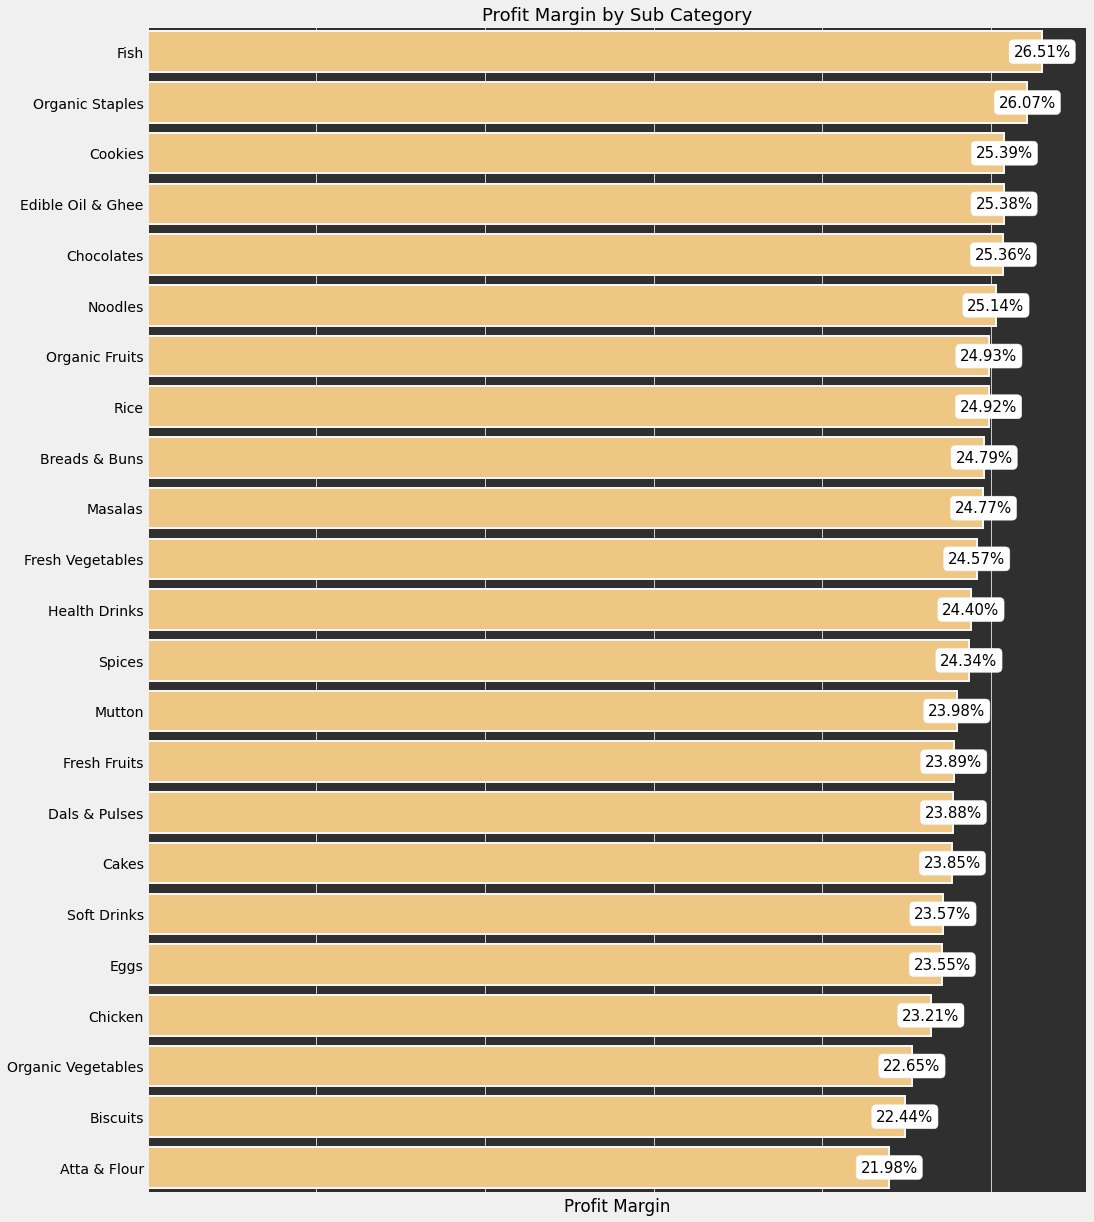

In [404]:
# fixing the graph size
plt.rcParams['figure.figsize'] = (15,20)

# setting up the background color
ax = plt.axes()
ax.set_facecolor('#2F2F2F')

# plotting a bar graph
sns.barplot(y='Sub Category', x='Profit Margin', data=profit, color='#FFCB74', linewidth=2, edgecolor='#F6F6F6')

# annotating the values on the graph
bbox_args = dict(boxstyle = 'round', fc = '1')
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.2f}%'.format(width), 
             ha = 'center', 
             va = 'center', 
             color = 'black', 
             bbox = bbox_args, 
             fontsize = 15)

# formatting the graph
plt.title('Profit Margin by Sub Category', fontsize = 18)
plt.tick_params(left=False, bottom=False, labelbottom=False)
plt.ylabel(None)

plt.show()

### How much did the company lose by giving discounts?

To find the amount that the company lost by giving discounts, we need to find the original price. We've the sold price of the product in the dataset. We also have the discount percentage for that product.

The formula to find the original price is (Sold Price * 100)/100 - (Discount Percent * 100)

In [405]:
df['Original Price'] = round((df['Sales'])*100/(100-(df['Discount']*100)),2)
df['Discounted Amount'] = df['Original Price'] - df['Sales']
df.head(2)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Year,Original Price,Discounted Amount
1,OD30,Customer,Oil & Masala,Masalas,Kanyakumari,9/17/2016,East,989.000000,0.17,69.23,Tamil Nadu,2016,1191.57,202.570000
2,OD31,Ramesh,Beverages,Soft Drinks,Dharmapuri,9/17/2016,East,1498.946381,0.24,166.05,Tamil Nadu,2016,1972.30,473.353619


In [406]:
discounts = pd.pivot_table(data=df, index='Sub Category',
               values='Discounted Amount', 
               aggfunc='sum').reset_index().sort_values(by='Discounted Amount', ascending=False)
discounts

,Sub Category,Discounted Amount
21,Soft Drinks,182352.362493
2,Breads & Buns,149817.854397
16,Noodles,144181.056971
14,Masalas,140050.795255
15,Mutton,135027.195255
13,Health Drinks,130188.737346
12,Fresh Vegetables,126198.170107
7,Dals & Pulses,117604.845442
3,Cakes,93971.743727
5,Chocolates,89506.642011


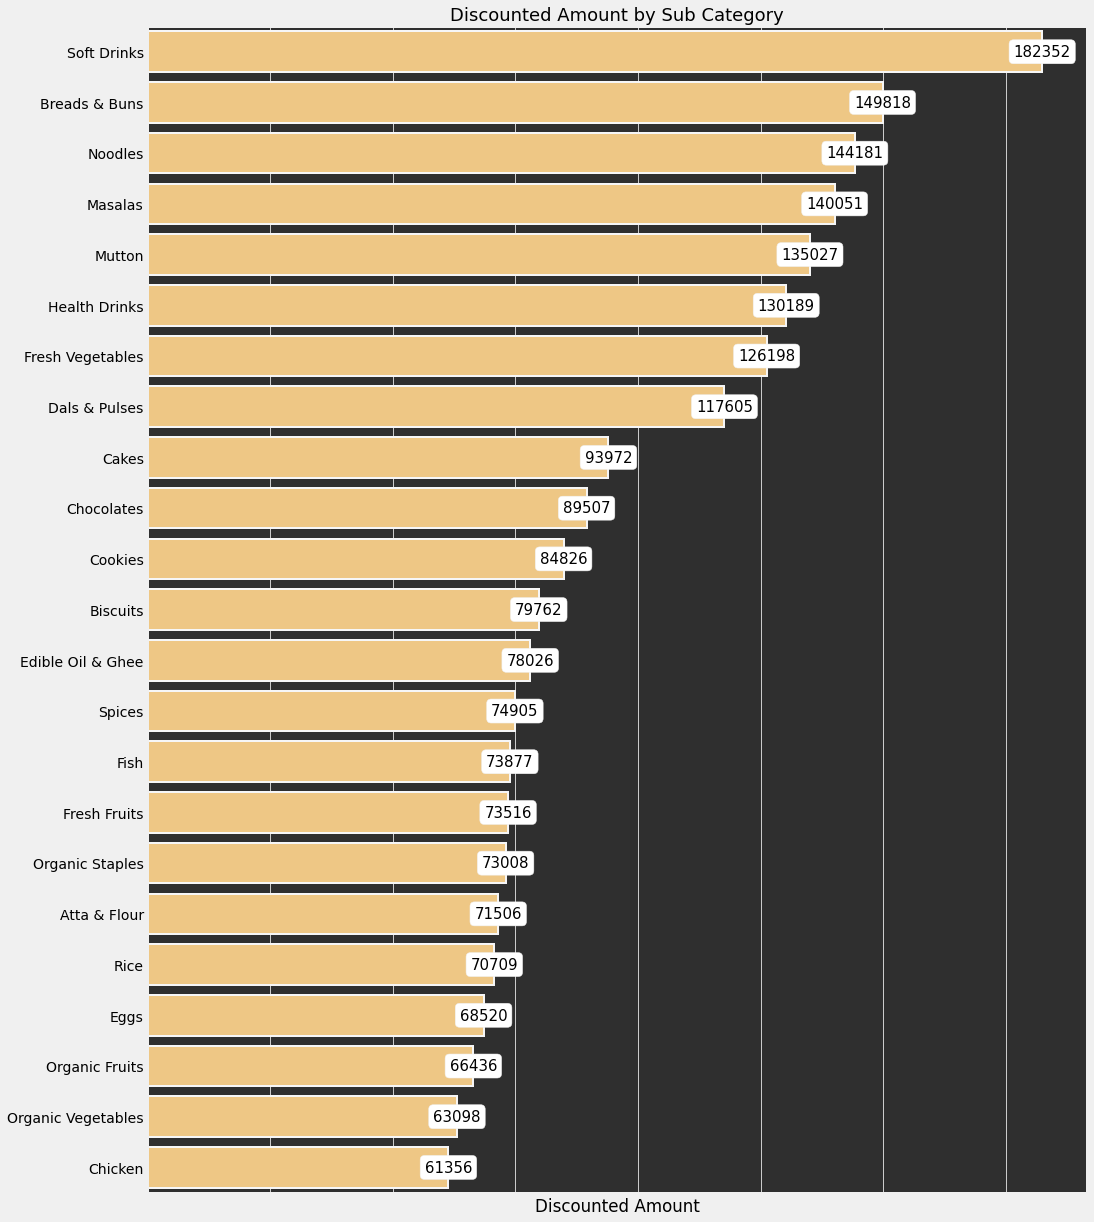

In [407]:
# fixing the graph size
plt.rcParams['figure.figsize'] = (15,20)

# setting up the background color
ax = plt.axes()
ax.set_facecolor('#2F2F2F')

# plotting a bar graph
sns.barplot(y='Sub Category', x='Discounted Amount', data=discounts, color='#FFCB74', linewidth=2, edgecolor='#F6F6F6')

# annotating the values on the bar graph
bbox_args = dict(boxstyle = 'round', fc = '1')
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
             ha = 'center', 
             va = 'center', 
             color = 'black', 
             bbox = bbox_args, 
             fontsize = 15)

#formatting the graph
plt.title('Discounted Amount by Sub Category', fontsize = 18)
plt.tick_params(left=False, bottom=False, labelbottom=False)
plt.ylabel(None)
plt.show()

### Total Sales & Orders by Year

In [408]:
year_performance = pd.pivot_table(data=df, index='Order Year', values=['Order ID', 'Sales', 'Profit'], 
               aggfunc={'Order ID':'count', 'Sales':'sum', 'Profit':'sum'}).reset_index()
year_performance

,Order Year,Order ID,Profit,Sales
0,2015,990,360708.22,1.476879e+06
1,2016,997,370228.85,1.514474e+06
2,2017,1262,452612.88,1.896012e+06
3,2018,1658,617391.06,2.507215e+06


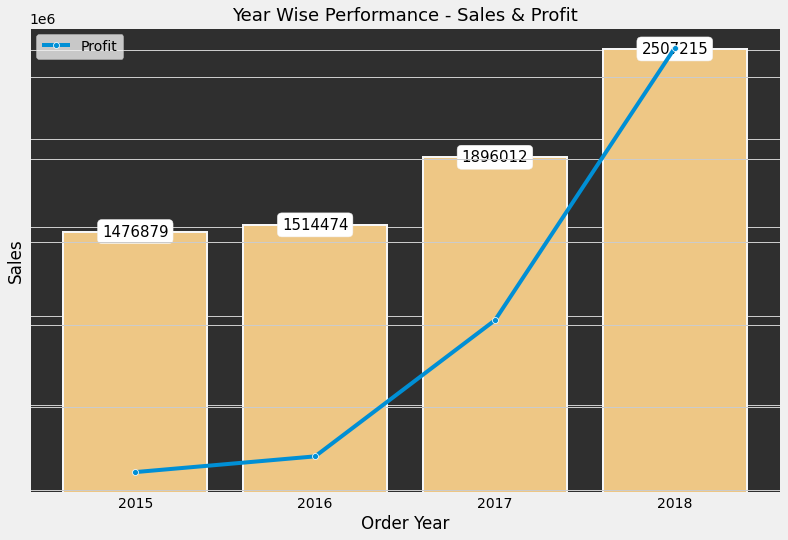

In [409]:
# setting up the graph size
plt.rcParams['figure.figsize'] = (12,8)

# setting up the background color
ax = plt.axes()
ax.set_facecolor('#2F2F2F')

# plotting a bar graph
ax1 = sns.barplot(x='Order Year', y='Sales', data=year_performance, color='#FFCB74', linewidth=2, edgecolor='#F6F6F6')
plt.tick_params(left=False, labelleft=False)

# annotating the values on the graph
bbox_args = dict(boxstyle = 'round', fc = '1')
for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + 0.5 * p.get_width(), p.get_height(), '{:1.0f}'.format(height), 
             ha = 'center', 
             va = 'center', 
             color = 'black', 
             bbox = bbox_args, 
             fontsize = 15)

# setting up the dual axis
ax2 = ax1.twinx()

# plotting a line graph on the secondary axis
sns.lineplot(x='Order Year', y='Profit', data=year_performance, linewidth=4, marker='o')

# formatting the graph
plt.title('Year Wise Performance - Sales & Profit', fontsize = 18)
plt.ylabel(None)
plt.legend(['Profit'], loc='upper left')
plt.tick_params(right=False, labelright=False)
plt.show()

## Answering the Questions

### 1) Who are the most loyal customers? 
Note: Customers who placed more than 20 orders every year 

We'll pivot the values by using the .pivot_table() function and then filter it with the above condition.

In [410]:
customers = pd.pivot_table(data=df, index='Customer Name', columns='Order Year', 
               values='Order ID', aggfunc='count')
customers = customers[(customers['2015']>18) & (customers['2016']>18) & (customers['2017']>18) & (customers['2018']>18)]
customers

Order Year,2015,2016,2017,2018
Customer Name,,,,
Customer,204,207,264,319
Haseena,19,23,22,25
Veena,19,22,25,24


**Answer: No customer with the records of order more than 20 from 2015 to 2018, But Haseena and Veena is the most closest to become the most loyal customer**

### 2) What is the rank of the sub category in 2018, that ranked the fifth in 2016?
Note: Take sales as the parameter to compute rank

We'll first pivot the data and then apply the rank() function.

In [411]:
sales_sc = pd.pivot_table(data=df, index='Sub Category', columns = 'Order Year', values='Sales', aggfunc='sum').reset_index()
sales_sc['Rank_2016'] = sales_sc['2016'].rank(method='max', ascending=False)
sales_sc['Rank_2018'] = sales_sc['2018'].rank(method='max', ascending=False)
sales_sc.sort_values(by='Rank_2016')

Order Year,Sub Category,2015,2016,2017,2018,Rank_2016,Rank_2018
21,Soft Drinks,117443.088472,111754.356568,147691.195710,223529.766756,1.0,1.0
2,Breads & Buns,113180.088472,109282.410188,115160.088472,157857.088472,2.0,4.0
12,Fresh Vegetables,82817.517426,93452.356568,102346.463807,125078.142091,3.0,8.0
13,Health Drinks,76586.517426,92358.356568,104173.356568,140704.142091,4.0,6.0
16,Noodles,101025.195710,90000.517426,157669.659517,145179.820375,5.0,5.0
14,Masalas,79920.195710,86196.463807,126767.142091,163531.713137,6.0,3.0
7,Dals & Pulses,68119.731903,80070.624665,114632.034853,129915.713137,7.0,7.0
15,Mutton,101310.356568,71450.410188,114381.981233,163643.766756,8.0,2.0
1,Biscuits,48830.624665,67739.624665,64735.731903,83496.302949,9.0,16.0
3,Cakes,71894.517426,67589.302949,57768.517426,109830.088472,10.0,10.0


**Answer: Noodles is in the 5th rank both in 2016 and 2018.**

### 3) Which Category is among the top 5 position in Sales, all the years?

In [412]:
sales_c = pd.pivot_table(data=df, index='Category', columns = 'Order Year', values='Sales', aggfunc='sum').reset_index()
sales_c['2015_Rank'] = sales_c['2015'].rank(method='max', ascending=False)
sales_c['2016_Rank'] = sales_c['2016'].rank(method='max', ascending=False)
sales_c['2017_Rank'] = sales_c['2017'].rank(method='max', ascending=False)
sales_c['2018_Rank'] = sales_c['2018'].rank(method='max', ascending=False)
sales_c

Order Year,Category,2015,2016,2017,2018,2015_Rank,2016_Rank,2017_Rank,2018_Rank
0,Bakery,233905.230563,244611.337802,237664.337802,351183.479893,2.0,1.0,7.0,6.0
1,Beverages,194029.605898,204112.713137,251864.552279,364233.908847,5.0,5.0,5.0,3.0
2,"Eggs, Meat & Fish",242459.337802,211037.552279,287986.426273,379376.211796,1.0,4.0,3.0,1.0
3,Food Grains,181008.659517,225456.713137,313339.587131,370530.943700,7.0,3.0,1.0,2.0
4,Fruits & Veggies,213013.123324,244582.230563,247433.445040,353457.640751,4.0,2.0,6.0,5.0
5,Oil & Masala,182564.391421,182723.820375,264102.694370,331354.694370,6.0,7.0,4.0,7.0
6,Snacks,229898.445040,201949.820375,293620.801609,357078.319035,3.0,6.0,2.0,4.0


In [414]:
sales_c[(sales_c['2015_Rank'] <=5) & (sales_c['2016_Rank'] <=5) & (sales_c['2017_Rank'] <=5) & (sales_c['2018_Rank'] <=5)]

Order Year,Category,2015,2016,2017,2018,2015_Rank,2016_Rank,2017_Rank,2018_Rank
1,Beverages,194029.605898,204112.713137,251864.552279,364233.908847,5.0,5.0,5.0,3.0
2,"Eggs, Meat & Fish",242459.337802,211037.552279,287986.426273,379376.211796,1.0,4.0,3.0,1.0


**Answer: Only the Eggs, Meat & Fish Category is consistent in the sales across years.**

### 4) Did the region with least Sales/Order record the least Profit/Order?

In [415]:
sales_orders_region = pd.pivot_table(data=df, index='Region', values=['Order ID', 'Sales', 'Profit'], 
               aggfunc = {'Order ID':'count', 'Sales':'sum', 'Profit':'sum'}).reset_index().sort_values(by='Sales', ascending=False)
sales_orders_region['Sales Per Order'] = sales_orders_region['Sales']/sales_orders_region['Order ID']
sales_orders_region['Profit Per Order'] = sales_orders_region['Profit']/sales_orders_region['Order ID']
sales_orders_region[['Region', 'Sales Per Order', 'Profit Per Order']]

,Region,Sales Per Order,Profit Per Order
3,West,1510.211077,361.130937
1,East,1495.989712,367.799379
0,Central,1505.089402,362.657207
2,South,1522.505254,383.523060


**Answer: No, East region has the least Sales/Order but the least Profit/Order is in the West Region.**

### 5) Which city has the more Chicken & Mutton lovers?

In [416]:
mutton = df[(df['Sub Category'] == 'Mutton') | (df['Sub Category'] == 'Chicken')]

mutton_pivot = pd.pivot_table(data=mutton, index='City', 
                               values='Order ID', aggfunc='count').sort_values(by='Order ID', ascending=False)
mutton_pivot.head(1)

,Order ID
City,
Bodi,83


**Answer: Customers from Bodi have ordered chicken and mutton more times than others.**

### 6) Name three cities which have the highest Sales/Customers for Cakes and Chocolates.

In [417]:
chocolate_cakes = df[(df['Sub Category'] == 'Cakes') | (df['Sub Category'] == 'Chocolates')]

avg_sales_per_customer = pd.pivot_table(data=chocolate_cakes, index='City', values=['Sales', 'Customer Name'], 
               aggfunc = {'Customer Name':'count', 'Sales':'sum'}).reset_index()
avg_sales_per_customer['Sales Per Customer'] = round(avg_sales_per_customer['Sales']/avg_sales_per_customer['Customer Name'], 2)
avg_sales_per_customer[['City','Sales Per Customer']].sort_values(by='Sales Per Customer', ascending=False).head(3)

,City,Sales Per Customer
20,Trichy,1779.06
15,Ramanadhapuram,1697.00
2,Coimbatore,1657.07


**Answer: Trichy, Ramanadhapuram and Coimbatore are the three cities that have the highest Sales/Customer for Cakes and Chocolate sub categories.**